### Importación de datos



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [23]:
def suma(tienda):
  return tienda["Precio"].sum()

ventas_1= suma(tienda)
ventas_2= suma(tienda2)
ventas_3= suma(tienda3)
ventas_4= suma(tienda4)

In [24]:
resumen= pd.DataFrame({"Total de  ventas":[ventas_1, ventas_2, ventas_3, ventas_4]})
resumen.index= ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
resumen

,Total de ventas
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [25]:
def categorias(tienda):
    return tienda["Categoría del Producto"].value_counts()

categorias_1 = categorias(tienda)
categorias_2 = categorias(tienda2)
categorias_3 = categorias(tienda3)
categorias_4 = categorias(tienda4)

tabla_comparativa = pd.DataFrame(pd.concat(
    [categorias_1, categorias_2, categorias_3, categorias_4],axis=1,
    keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
)


tabla_comparativa


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


# 3. Calificación promedio de la tienda


In [26]:
def promedio(tienda,columna):
  prom= round(tienda[columna].mean(),2)
  return prom


promedio_1= promedio(tienda, "Calificación")
promedio_2= promedio(tienda2,"Calificación")
promedio_3= promedio(tienda3,"Calificación")
promedio_4= promedio(tienda4,"Calificación")

In [27]:
resumen["Clasificación promedio"]= [promedio_1, promedio_2, promedio_3, promedio_4]
resumen

,Total de ventas,Clasificación promedio
Tienda 1,1.150880e+09,3.98
Tienda 2,1.116344e+09,4.04
Tienda 3,1.098020e+09,4.05
Tienda 4,1.038376e+09,4.00


# 4. Productos más y menos vendidos

In [28]:
def ventas(tienda):
  producto= tienda["Producto"].value_counts()
  max_freq= producto.idxmax()
  min_freq= producto.idxmin()
  maximo= producto.max()
  minimo= producto.min()
  print(f" Producto más vendido: {max_freq} ({maximo} veces) ")
  print(f" Producto menos vendido: {min_freq} ({minimo} veces)")
  return
print("Tienda 1")
ventas(tienda)
print("Tienda 2")
ventas(tienda2)
print("Tienda 3")
ventas(tienda3)
print("Tienda 4")
ventas(tienda4)


Tienda 1
 Producto más vendido: Microondas (60 veces) 
 Producto menos vendido: Auriculares con micrófono (33 veces)
Tienda 2
 Producto más vendido: Iniciando en programación (65 veces) 
 Producto menos vendido: Juego de mesa (32 veces)
Tienda 3
 Producto más vendido: Kit de bancas (57 veces) 
 Producto menos vendido: Bloques de construcción (35 veces)
Tienda 4
 Producto más vendido: Cama box (62 veces) 
 Producto menos vendido: Guitarra eléctrica (33 veces)


# 5. Envío promedio por tienda

In [29]:
#usando la funcion de promedio anteriormente definida

envio_1= promedio(tienda,"Costo de envío")
envio_2= promedio(tienda2,"Costo de envío")
envio_3= promedio(tienda3,"Costo de envío")
envio_4= promedio(tienda4,"Costo de envío")

resumen["Costo de envío promedio"]= [envio_1, envio_2, envio_3, envio_4]
resumen

,Total de ventas,Clasificación promedio,Costo de envío promedio
Tienda 1,1.150880e+09,3.98,26018.61
Tienda 2,1.116344e+09,4.04,25216.24
Tienda 3,1.098020e+09,4.05,24805.68
Tienda 4,1.038376e+09,4.00,23459.46


# Graficas

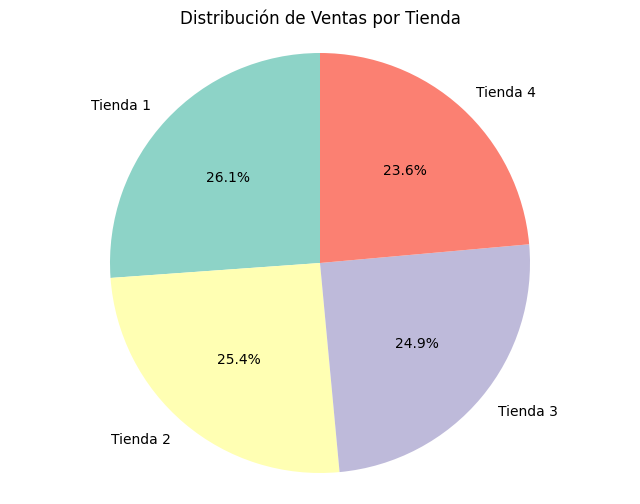

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(resumen["Total de  ventas"], labels=resumen.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(resumen)))
plt.title("Distribución de Ventas por Tienda")
plt.axis('equal')
plt.show()

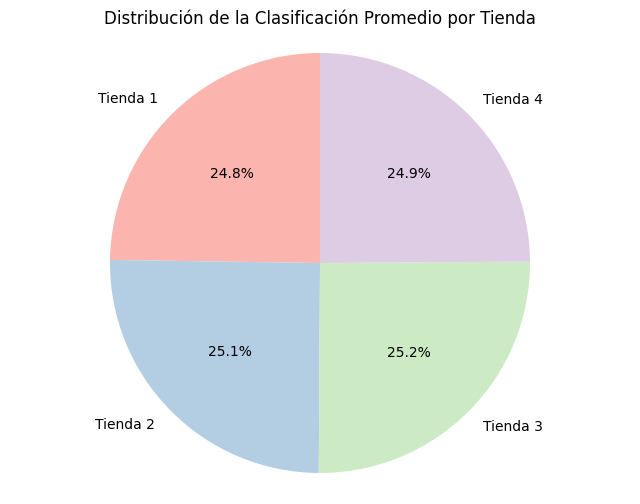

In [39]:
plt.figure(figsize=(8, 6))
plt.pie(resumen["Clasificación promedio"], labels=resumen.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Pastel1", len(resumen)))
plt.title("Distribución de la Clasificación Promedio por Tienda")
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


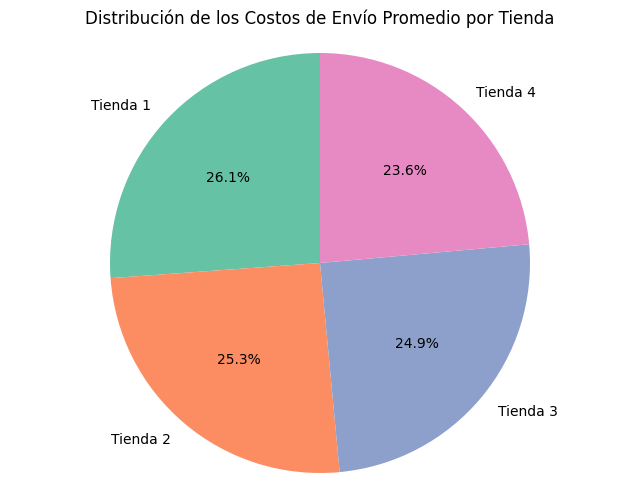

In [40]:
plt.figure(figsize=(8, 6))
plt.pie(resumen["Costo de envío promedio"], labels=resumen.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(resumen)))
plt.title("Distribución de los Costos de Envío Promedio por Tienda")
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

###Respuesta

Al analizar los resultados, la clasificacion promedio de las tiendas es similar, al comparar los costos de envio promedio se denota que la tienda 1 posee un mayor costo de envio pero genera mayores ventas, y la tienda 4 es la que genera menores ventas, por lo que se recomienda vender la tienda 4.